# Phys 453: Fourier Transforms

This exercise will demonstrate how to perform Discrete Fourier Transforms with the Numpy Python library.  It will also point out some of the subtleties involved in using Discrete Fourier Transforms to approximate Continuous Fourier Transforms.

### Relating Continuous and Discrete Fourier Transforms
In physics we typically deal with continuous Fourier transforms, defined as
$$ F(k)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} f(x) e^{-ikx} dx $$
where both $x$ and $k$ range from $-\infty$ to $\infty$.  Actually computing this integral by hand can be quite hard for a general function $f(x)$, so it would be nice if we could make a computer do the work for us.  However, computers typically don't deal well with infinities, don't understand what $\int$ or $dx$ means, and can't store the infinite (uncountable) number of values of $f(x)$ (one for every real value of $x$).

In order to overcome these issues, what we actually do on a computer is approximate the Continuous Fourier Transform we want with a Discrete Fourier Transform.  The Python library Numpy has a method, [numpy.fft.fft()](https://docs.scipy.org/doc/numpy/reference/routines.fft.html), which takes an array of $n$ values, $a_m$ (thought of as samples of some signal or function), and calculates the Discrete Fourier Transform, $A_{\tilde{k}}$, as
$$A_{\tilde{k}} = \sum_{m=0}^{n-1} a_m \exp{\left(-2\pi i \frac{m\tilde{k}}{n}\right)}$$
where $\tilde{k} = 0,1,...,n-1$. The way Python computes this is actually with a specific algorithm for computing Discrete Fourier Transforms, called the [Fast Fourier Transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform) (FFT).  Understanding the FFT algorithm is not important here, but it's good trivia to know that the development of the FFT is one of the great algorithmic accomplishments of the last century, and underpins much of our modern technology and science.

At this point, we have a method to compute a Discrete Fourier Transform, and we want to use it approximate the Continuous Fourier Transform of a function, $f(x)$. Let's begin by supposing that our function $f(x)$ is zero (or close to it) outside of some domain $x \in (a,b)$. Then we can make our first aproximation
$$ F(k)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} f(x) e^{-ikx} dx \approx \frac{1}{\sqrt{2\pi}}\int_{a}^{b} f(x) e^{-ikx} dx$$

Now let's go back to introductory calculus, where we learned that integrals can be approximated by summing a bunch of [narrow boxes](http://tutorial.math.lamar.edu/Classes/CalcI/AreaProblem.aspx), each with a height of the function at specific, discrete locations, $x_m$. If we choose to approximate the integral with the sum of $n$ samples, then the width of the boxes is $\Delta x=\frac{b-a}{n}$ and the function is sampled at locations $x_m = a+m\Delta x$, where $m=0,1,..,n-1$. Using this "discretization", our approximation for the Fourier Transform is
$$ F(k) \approx \frac{\Delta x}{\sqrt{2\pi}}\sum_{m=0}^{n-1} f(x_m) e^{-ikx_m} = \frac{\Delta x}{\sqrt{2\pi}}e^{-ika}\sum_{m=0}^{n-1} f(x_m) e^{-ikm\Delta x}$$
At this point we see that the sum calculated here is the same as in the Discrete Fourier Transform as long as we identify
$$k=2\pi \tilde{k} / n\Delta x$$
Note that making this identification also means that we have resigned ourselves to only calculating the Fourier transform for a discrete set of $k$ values.  However, as long as we use enough samples (a large $n$) this should give us plenty of information to approximate the Continuous Fourier Transform.

Another important thing to notice is that because $k$ is now discrete, there is a cutoff at a maximum $k_{max}$ and only a finite number of wavelengths of included in the Fourier Transform.  The cutoff implies that there is a minimum wavelength ($k\approx1/\lambda$), which makes sense because the sampling means we don't have any information about the original function on length scales smaller than $\Delta x$.  As for the finite number of wavelengths, this implies that we can think of this as the Fourier Transform of a function that is only defined on $x\in (a,b)$, or as the Fourier Transform of a function that is *periodic* over the whole space, such that the function just repeats with period $b-a$. (This can be confusing, but think of a physical example: the vibration of a string anchored at two ends contains only a finite, discrete number of modes.  But if I think of the anchors as not the end of the string, but only as enforced nodes (like if I pinch the string there), then for a given combination of modes the vibration pattern of the string would repeat over the (possibly infinite) length of the string, with a spatial period equal to the distance between the anchors.)




### Fourier Transform of  Gaussian
Alright, now it's time to learn how to actually perform a Fourier Transform in Python.  It's always nice when doing numerical work to have a simple analytic result that you can test your code with, so we're going to consider the Fourier Transform of a Gaussian to check that we're getting everything right.
$$f(x) = \frac{1}{\sqrt{2\sigma^2 \pi}} e^{-x^2/2\sigma^2} \iff F(k)=\frac{1}{\sqrt{2 \pi}} e^{-\sigma^2 k^2/2}$$
Let's start by getting an array of the values of $f(x)$ on a grid from $x=-10$ to $x=10$, and then plotting the Gaussian.  This part is done for you, in case you need a refresher in Python.

In [1]:
#First we load all the libraries we'll need
#This is a magic command that let's matplotlib plots appear within Jupyter notebooks
%matplotlib notebook   
import matplotlib.pyplot as plt #matplotlib for plotting
import numpy           #Numpy for math things

dx =  0.1
sigma =  0.8
norm(f(x)) =  1.0


<IPython.core.display.Javascript object>


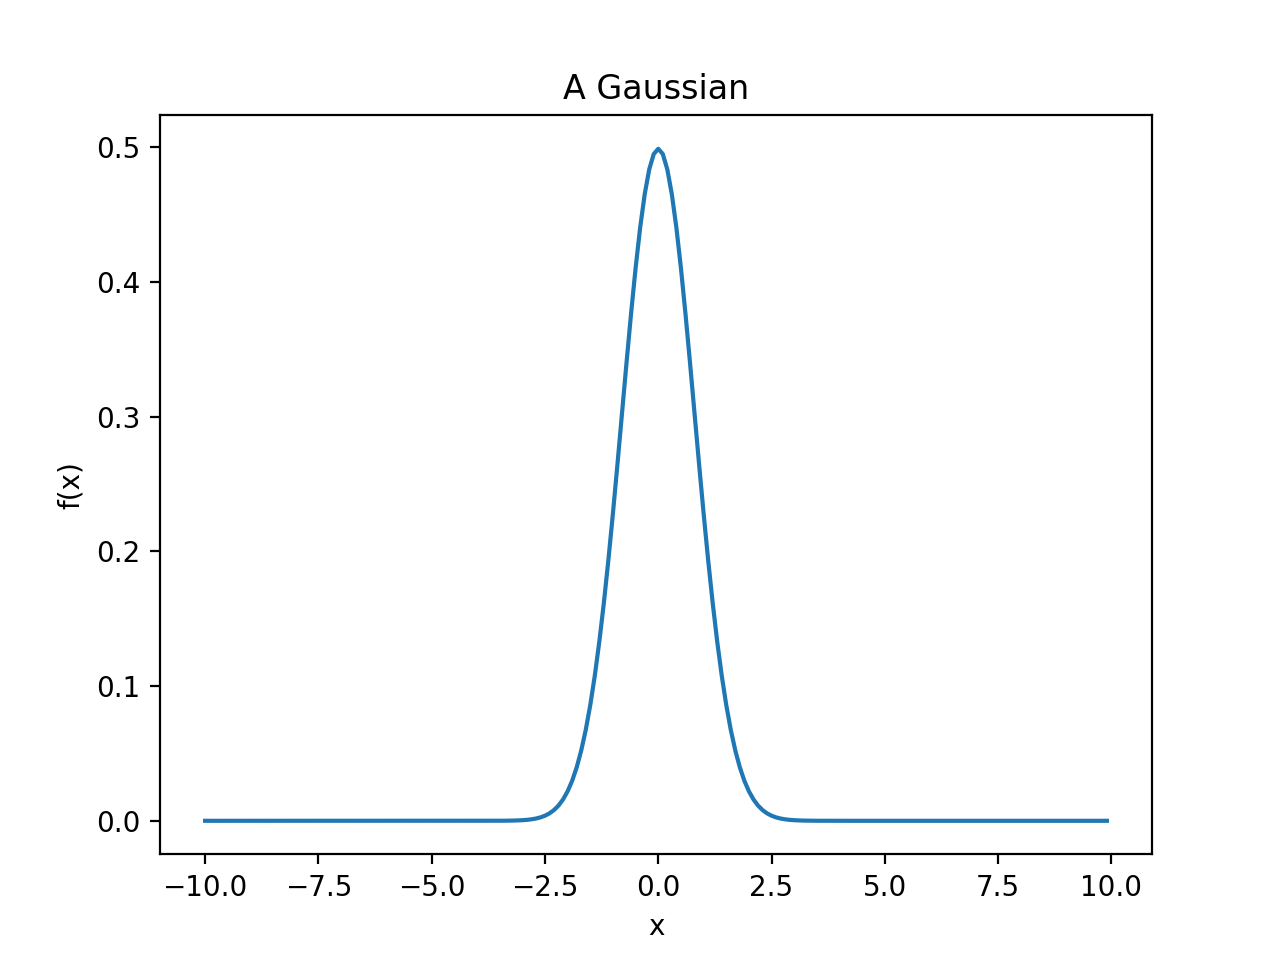

In [2]:
N=200      #Number of samples
dx = 20./N
x = numpy.arange(-10,10,dx)   #Define a grid from x=-10 to x=10, with spacing (10-(-10))/N = 20/N
sigma = 0.8                   #Random pick for sigma, you'll change this later on
f_x = 1./numpy.sqrt(2*numpy.pi*sigma**2)*numpy.exp(-x**2/(2*sigma**2)) #Get the values of the gaussian on the grid

#Print out some info
print("dx = ",dx)
print("sigma = ",sigma)
print("norm(f(x)) = ", 20./N*sum(f_x))

#Plot the gaussian
plt.figure()
plt.plot(x, f_x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("A Gaussian")
plt.show()

### Question 1
Okay, now it's time for you to do some work.  In order to plot the Fourier Transform at the end, we'll need the values of $k$.  Remember that 
$$k=2\pi \tilde{k} / n\Delta x$$
In addition, the Numpy library provides a simple function to return the "frequencies" being used in the FFT, called [numpy.fft.fftfreq()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html#numpy.fft.fftfreq). Basically, this method returns an array of $\tilde{k}/n$.  (Note that in a Fourier Transform, using frequencies from $0$ to $n$ yields the same information as using frequencies from $-n/2$ to $(n-1)/2$, since $A_{\tilde{k}}=A_{\tilde{k}+n}$) Use this function to obtain an array of the values of $k$.

In [3]:
k = 2*numpy.pi*numpy.fft.fftfreq(N, d=dx)   #This is the line you need to fix
print("frequencies (k) = \n",k)

frequencies (k) = 
 [  0.           0.31415927   0.62831853   0.9424778    1.25663706
   1.57079633   1.88495559   2.19911486   2.51327412   2.82743339
   3.14159265   3.45575192   3.76991118   4.08407045   4.39822972
   4.71238898   5.02654825   5.34070751   5.65486678   5.96902604
   6.28318531   6.59734457   6.91150384   7.2256631    7.53982237
   7.85398163   8.1681409    8.48230016   8.79645943   9.1106187
   9.42477796   9.73893723  10.05309649  10.36725576  10.68141502
  10.99557429  11.30973355  11.62389282  11.93805208  12.25221135
  12.56637061  12.88052988  13.19468915  13.50884841  13.82300768
  14.13716694  14.45132621  14.76548547  15.07964474  15.393804
  15.70796327  16.02212253  16.3362818   16.65044106  16.96460033
  17.27875959  17.59291886  17.90707813  18.22123739  18.53539666
  18.84955592  19.16371519  19.47787445  19.79203372  20.10619298
  20.42035225  20.73451151  21.04867078  21.36283004  21.67698931
  21.99114858  22.30530784  22.61946711  22.93362637  23.24

### Question 2
Now real problem. Use the Numpy FFT routine to calculate the approximation to the Continuous Fourier Transform of the gaussian, using the formulas we derived at the top.  Also, create an array with the exact values of the Fourier Transform, from the analytic result up above.

In [4]:
F_k = numpy.exp(1j*k*x[0])*dx*numpy.fft.fft(f_x)/numpy.sqrt(2*numpy.pi)   #Calculate the FFT with Numpy

F_k_exact = 1./numpy.sqrt(2*numpy.pi)*numpy.exp(-sigma**2*x**2/2)  #Get the exact result for comparison

### Question 3
Now let's make sure we're doing things correctly.  This code makes two plots, one with $f(x)$, and the other with the numerical and exact Fourier Transforms.  Does the code appear to be working?  If not, go back and check your work.  Once your results seem sensible, try changing the value of $\sigma$.  Write beneath the plots how changing $\sigma$ changes the shape of the guassian and it's Fourier Transform.

<IPython.core.display.Javascript object>


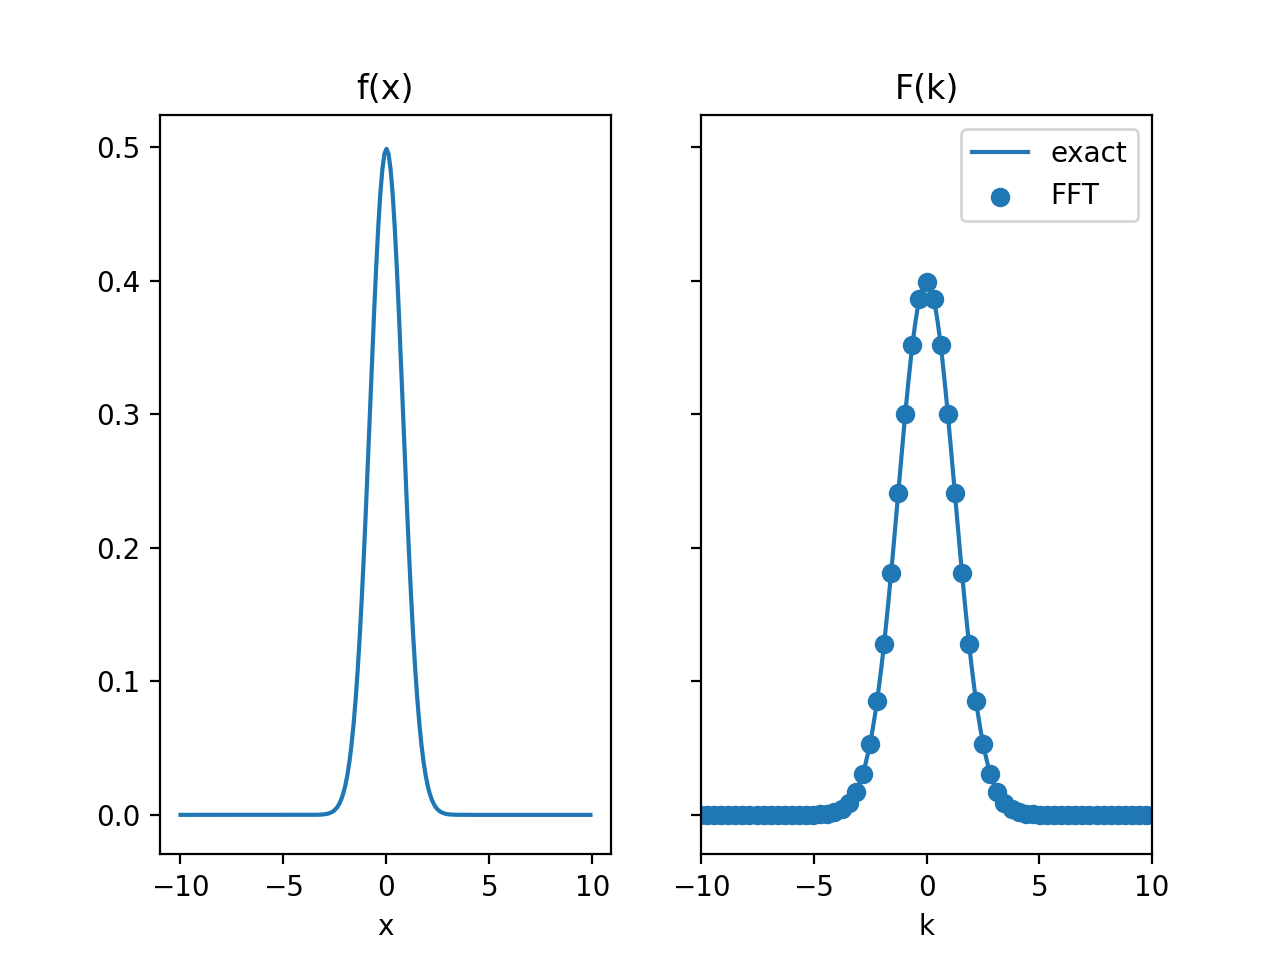

(-10, 10)

In [5]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, f_x)
ax1.set_title('f(x)')
ax1.set_xlabel('x')
ax2.scatter(k, F_k.real, label="FFT")
ax2.plot(x, F_k_exact, label="exact")
ax2.set_title('F(k)')
ax2.set_xlabel('k')
ax2.legend()
ax2.set_xlim(-10,10)

You can write your answer here!